In [143]:
# Importando as Bibliotecas necessárias ao Projeto

import nltk
!python3 -m spacy download pt_core_news_lg
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import pipeline
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import torch
import string
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [144]:
# Classificando o texto das Histórias de Usuário em uma categoria especifica utilizando o modelo de treinamento zero shot

classifier = pipeline("zero-shot-classification")
candidate_labels = ["testador", "suporte", "ferramenta"]

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [145]:
# Utilizando o modelo de Treino roberta para Identificar as entidades nomeadas

roberta = pipeline("ner", grouped_entities=True, model="joelniklaus/legal-portuguese-roberta-base")

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at joelniklaus/legal-portuguese-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [146]:
# Criando as Histórias de Usuários (exemplos de teste para treino) e as guardando em uma lista para ser manipulada de acordo com a necessidade

historias_usuario = [
    "Como Testador eu quero um jeito mais fácil de incluir os requisitos do aplicativo na ferramenta DRL-Mobtest para criar casos de teste que cubram tudo que o aplicativo precisa fazer, sem ter que gastar muito tempo escrevendo manualmente.",
    "Como Testador eu quero uma maneira de ensinar a ferramenta DRL-Mobtest a entender os requisitos do aplicativo usando NLP para fazer com que a ferramenta gere testes automaticamente.",
    "Como Testador eu quero que a ferramenta gere casos de teste abrangentes que cubram integralmente todos os requisitos do aplicativo, assegurando que o software seja completo e funcional, sem depender exclusivamente da criação manual de casos de teste.",
    "Como Testador eu quero que a ferramenta seja integrada com outras ferramentas de gerenciamento, permitindo sincronização automática dos requisitos e facilitando o processo de criação de casos de testes.",
    "Como Testador eu quero que a ferramenta  forneça o recurso de criação de relatórios detalhados sobre a cobertura dos testes, permitindo uma análise precisa sobre sua progressão e identificação das lacunas durante sua execução.",
    "Como testador, quero uma maneira mais fácil de incluir requisitos do aplicativo para criar casos de teste abrangentes, economizando tempo na escrita manual.",
    "Como testador, desejo ensinar a ferramenta a entender os requisitos do aplicativo usando NLP para gerar testes automaticamente.",
    "Como testador, preciso que a ferramenta gere casos de teste completos e funcionais que cubram todos os requisitos do aplicativo.",
    "Como testador, quero integração com outras ferramentas de gerenciamento para sincronizar automaticamente requisitos e facilitar a criação de casos de teste.",
    "Como testador, quero relatórios detalhados sobre a cobertura dos testes para análise precisa durante a execução.",
    "Como testador, desejo que a ferramenta identifique automaticamente os casos de teste mais críticos para priorizar a análise.",
    "Como testador, preciso que a ferramenta sugira casos de teste com base em padrões de uso real do aplicativo.",
    "Como testador, quero sugestões com base em padrões de falha históricos para evitar problemas recorrentes no software.",
    "Como testador, desejo suporte à execução de testes automatizados em diferentes dispositivos e ambientes.",
    "Como testador, preciso que a ferramenta detecte automaticamente mudanças nos requisitos e ajuste os casos de teste correspondentes.",
    "Como testador, quero integração com sistemas de controle de versão para rastrear mudanças nos requisitos e no código-fonte.",
    "Como testador, desejo métricas detalhadas sobre a eficácia dos testes, incluindo taxa de cobertura e taxa de falha.",
    "Como testador, preciso de suporte à execução de testes de desempenho e escalabilidade.",
    "Como testador, quero análise automática dos resultados dos testes para relatórios detalhados sobre problemas encontrados.",
    "Como testador, desejo simular cenários de teste complexos e realistas para garantir testes próximos à realidade.",
    "Como testador, preciso de suporte à execução de testes de regressão automatizados.",
    "Como testador, quero identificação automática de casos de teste redundantes ou desnecessários.",
    "Como testador, desejo integração fácil com ferramentas de gerenciamento de projetos.",
    "Como testador, preciso de suporte à execução de testes de usabilidade.",
    "Como testador, quero que a ferramenta crie automaticamente conjuntos de dados de teste realistas.",
    "Como testador, desejo integração com ferramentas de monitoramento de desempenho em tempo real.",
    "Como testador, preciso de suporte à execução de testes de localização e internacionalização.",
    "Como testador, quero geração automática de dados de teste sintéticos.",
    "Como testador, desejo suporte à execução de testes de acessibilidade.",
    "Como testador, preciso de suporte à execução de testes de integração contínua.",
    "Como testador, quero identificação automática de casos de teste incompletos ou mal definidos.",
    "Como testador, desejo identificação automática de dependências entre casos de teste.",
    "Como testador, preciso de suporte à execução de testes de recuperação de desastres.",
    "Como testador, quero que a ferramenta identifique automaticamente casos de teste paralelizáveis.",
    "Como testador, desejo simulação de cenários de teste de carga extremamente alta.",
    "Como testador, preciso de suporte à execução de testes de compatibilidade com diferentes navegadores e dispositivos.",
    "Como testador, quero geração automática de relatórios de teste personalizados.",
    "Como testador, desejo rastreamento automático de resultados de teste ao longo do tempo.",
    "Como testador, preciso de suporte à execução de testes de regressão progressiva.",
    "Como testador, quero sugestões automáticas para aprimorar os casos de teste existentes.",
    "Como testador, desejo que a ferramenta aprenda com os resultados dos testes e melhore suas sugestões futuras.",
    "Como testador, preciso de suporte à execução de testes de segurança automatizados.",
    "Como testador, quero integração com ferramentas de análise de código estático para identificar áreas de risco.",
    "Como testador, desejo suporte à execução de testes de integração de sistema e teste de aceitação do usuário.",
    "Como testador, preciso de suporte à execução de testes de confiabilidade e disponibilidade.",
    "Como testador, quero que a ferramenta sugira casos de teste com base em modelos de qualidade de software reconhecidos.",
    "Como testador, desejo integração com ferramentas de automação de teste de interface do usuário.",
    "Como testador, preciso de suporte à execução de testes de estresse e robustez.",
    "Como testador, quero que a ferramenta sugira casos de teste para áreas de alto risco e complexidade.",
    "Como testador, desejo integração com ferramentas de gerenciamento de defeitos para rastreamento de correções.",
    "Como testador, preciso de suporte à execução de testes de usabilidade remota e teste de usuário beta.",
    "Como testador, quero que a ferramenta forneça feedback em tempo real durante a execução dos testes.",
    "Como testador, desejo integração com ferramentas de automação de infraestrutura para provisionamento e configuração automatizados.",
    "Como testador, preciso de suporte à execução de testes de comparação de desempenho para versões anteriores e atuais do aplicativo."
  ]

In [147]:
# Verificando as palavras que são unicas na lista de Histórias de Usuários e a diversidade Léxica encontrada

unicas = set(historias_usuario)

print("Total de palavras unicas:",len(unicas))

print("Diversidade Lexica:",len(unicas)/len(historias_usuario))

Total de palavras unicas: 54
Diversidade Lexica: 1.0


In [148]:
#sem_pontuacao = re.findall(r'\b(^[^A-Za-z])\b', historias_usuario, re.IGNORECASE)

In [149]:
# Crianndo uma classe e função para o processamento de texto

class ProcessadorHistoriasUsuario:
    def __init__(self):
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('wordnet')
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))

    def processar_historias_usuario(self, historias_usuario):
        freq_dists = []
        for historia_usuario in historias_usuario:
            tokens = word_tokenize(historia_usuario)
            tokens = [token.lower() for token in tokens if token not in string.punctuation]
            tokens = [token for token in tokens if token not in self.stop_words]
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
            freq_dist = FreqDist(tokens)
            freq_dists.append(freq_dist)
        return freq_dists

In [159]:
# Criando um objeto para processar as Histórias de Usuário.

processador = ProcessadorHistoriasUsuario()
freq_dists = processador.processar_historias_usuario(historias_usuario)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
# Imprime as cinco palavras comuns em cada História de Usuário

for i, freq_dist in enumerate(freq_dists):
    print(f"História de Usuário {i+1}: {freq_dist.most_common(5)}")

História de Usuário 1: [('aplicativo', 2), ('testador', 1), ('quero', 1), ('jeito', 1), ('fácil', 1)]
História de Usuário 2: [('ferramenta', 2), ('testador', 1), ('quero', 1), ('maneira', 1), ('ensinar', 1)]
História de Usuário 3: [('casos', 2), ('teste', 2), ('testador', 1), ('quero', 1), ('ferramenta', 1)]
História de Usuário 4: [('testador', 1), ('quero', 1), ('ferramenta', 1), ('integrada', 1), ('outras', 1)]
História de Usuário 5: [('sobre', 2), ('testador', 1), ('quero', 1), ('ferramenta', 1), ('forneça', 1)]
História de Usuário 6: [('testador', 1), ('quero', 1), ('maneira', 1), ('fácil', 1), ('incluir', 1)]
História de Usuário 7: [('testador', 1), ('desejo', 1), ('ensinar', 1), ('ferramenta', 1), ('entender', 1)]
História de Usuário 8: [('testador', 1), ('preciso', 1), ('ferramenta', 1), ('gere', 1), ('casos', 1)]
História de Usuário 9: [('testador', 1), ('quero', 1), ('integração', 1), ('outras', 1), ('ferramentas', 1)]
História de Usuário 10: [('testador', 1), ('quero', 1), ('

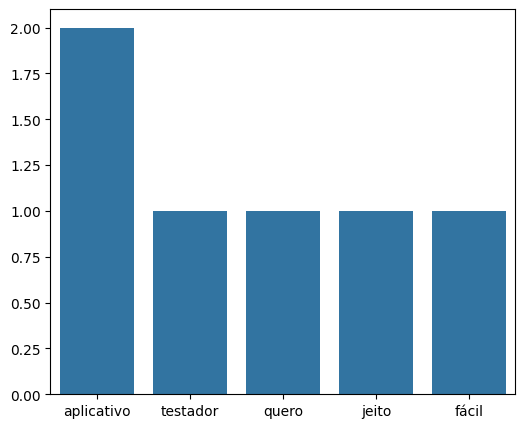

In [158]:
nome, valor = zip(*freq_dists[0].most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)
plt.show()

<Axes: >

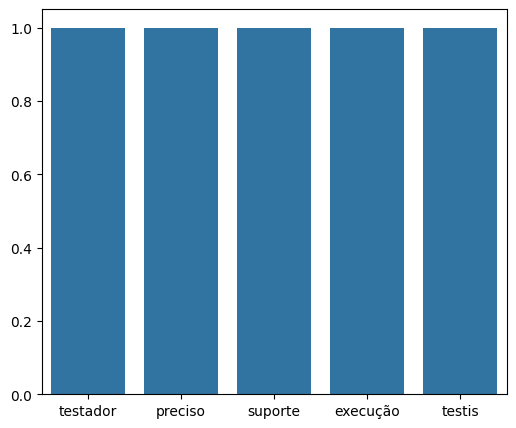

In [157]:
nome,valor = zip(*freq_dist.most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)

In [154]:
for i, historia_usuario in enumerate(historias_usuario):
    result = classifier(historia_usuario, candidate_labels=candidate_labels)
    top_label = result['labels'][0]
    confidence = result['scores'][0]
    print(f"História de Usuário {i+1}: Rótulo Previsto: {top_label}, Confiança: {confidence:.2f}")

História de Usuário 1: Rótulo Previsto: ferramenta, Confiança: 0.70
História de Usuário 2: Rótulo Previsto: testador, Confiança: 0.64
História de Usuário 3: Rótulo Previsto: testador, Confiança: 0.64
História de Usuário 4: Rótulo Previsto: testador, Confiança: 0.73
História de Usuário 5: Rótulo Previsto: testador, Confiança: 0.70
História de Usuário 6: Rótulo Previsto: testador, Confiança: 0.95
História de Usuário 7: Rótulo Previsto: testador, Confiança: 0.68
História de Usuário 8: Rótulo Previsto: testador, Confiança: 0.69
História de Usuário 9: Rótulo Previsto: testador, Confiança: 0.87
História de Usuário 10: Rótulo Previsto: testador, Confiança: 0.95
História de Usuário 11: Rótulo Previsto: testador, Confiança: 0.66
História de Usuário 12: Rótulo Previsto: testador, Confiança: 0.68
História de Usuário 13: Rótulo Previsto: testador, Confiança: 0.94
História de Usuário 14: Rótulo Previsto: testador, Confiança: 0.76
História de Usuário 15: Rótulo Previsto: testador, Confiança: 0.72
Hi

In [156]:
roberta(f"Resultado: {historias_usuario}")

[{'entity_group': 'LABEL_1',
  'score': 0.601121,
  'word': ' resultado : [',
  'start': 0,
  'end': 12},
 {'entity_group': 'LABEL_0',
  'score': 0.66017556,
  'word': " '",
  'start': 13,
  'end': 13},
 {'entity_group': 'LABEL_1',
  'score': 0.5858315,
  'word': ' como',
  'start': 14,
  'end': 17},
 {'entity_group': 'LABEL_0',
  'score': 0.50402534,
  'word': ' tes',
  'start': 19,
  'end': 21},
 {'entity_group': 'LABEL_1',
  'score': 0.70382684,
  'word': 'tador eu quero um jeito mais facil de incluir os requisitos do',
  'start': 21,
  'end': 83},
 {'entity_group': 'LABEL_0',
  'score': 0.50082815,
  'word': ' aplica',
  'start': 85,
  'end': 90},
 {'entity_group': 'LABEL_1',
  'score': 0.60487515,
  'word': 'tivo na',
  'start': 90,
  'end': 97},
 {'entity_group': 'LABEL_0',
  'score': 0.6233263,
  'word': ' ferramenta drl',
  'start': 99,
  'end': 112},
 {'entity_group': 'LABEL_1',
  'score': 0.54898244,
  'word': ' -',
  'start': 113,
  'end': 113},
 {'entity_group': 'LABEL_0',
